In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Configuration du simulateur quantique
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Définition du circuit quantique
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encodage des données en états quantiques
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    
    # Appliquer les portes pour le modèle
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    
    # Mesure de sortie
    return qml.expval(qml.PauliZ(0))

In [2]:
# Fonction pour normaliser les données
def normalize(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Jeu de données simple
X = np.array([[0.1, 0.5], [0.4, 0.8], [0.6, 0.3], [0.9, 0.7]])
y = np.array([0, 1, 1, 0])  # Classes correspondantes

# Normalisation des données
X_norm = normalize(X)

In [3]:
# Initialisation des paramètres du modèle
n_layers = 3
weights = np.random.random(size=(n_layers, n_qubits, 3), requires_grad=True)

# Définir une fonction de coût
def cost(weights):
    predictions = np.array([quantum_circuit(x, weights) for x in X_norm])
    return np.mean((predictions - y) ** 2)

# Optimisation des paramètres
opt = qml.GradientDescentOptimizer(stepsize=0.1)
n_epochs = 100

for epoch in range(n_epochs):
    weights = opt.step(lambda w: cost(w), weights)
    if epoch % 10 == 0:
        loss = cost(weights)
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# Évaluation du modèle
predictions = np.array([quantum_circuit(x, weights) for x in X_norm])
print("\nPrédictions finales :", np.round(predictions))



Epoch 0 | Loss: 0.3060
Epoch 10 | Loss: 0.2235
Epoch 20 | Loss: 0.2039
Epoch 30 | Loss: 0.1896
Epoch 40 | Loss: 0.1804
Epoch 50 | Loss: 0.1749
Epoch 60 | Loss: 0.1716
Epoch 70 | Loss: 0.1694
Epoch 80 | Loss: 0.1679
Epoch 90 | Loss: 0.1668

Prédictions finales : [0. 1. 1. 0.]


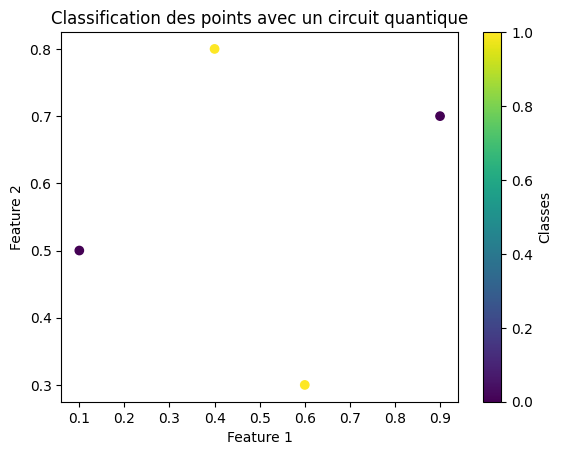

In [4]:
# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Vrai labels')
plt.title("Classification des points avec un circuit quantique")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classes")
plt.show()

In [5]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Charger et prétraiter MNIST
# Charger les données MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Réduction à deux classes (ex: '0' et '1')
X = X[(y == '0') | (y == '1')]
y = y[(y == '0') | (y == '1')].astype(int)

# Réduction de la taille des images et normalisation
X = X / 255.0
pca = PCA(n_components=8)  # Réduction de dimensions
X_reduced = pca.fit_transform(X)

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 2. Définir le circuit quantique
n_qubits = 8  # Un qubit par feature
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encodage des données
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')

    # Couches variationnelles
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    
    # Mesure pour prédire la classe
    return qml.expval(qml.PauliZ(0))

# Initialisation des poids
n_layers = 3
weights = np.random.random(size=(n_layers, n_qubits, 3), requires_grad=True)

# 3. Fonction de coût
def cost(weights):
    predictions = np.array([quantum_circuit(x, weights) for x in X_train])
    return np.mean((predictions - y_train) ** 2)

# 4. Optimisation
opt = qml.GradientDescentOptimizer(stepsize=0.1)
n_epochs = 50

for epoch in range(n_epochs):
    weights = opt.step(lambda w: cost(w), weights)
    if epoch % 10 == 0:
        loss = cost(weights)
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# 5. Prédictions sur les données de test
predictions = np.array([quantum_circuit(x, weights) for x in X_test])
predictions = np.round(predictions)

# Calcul de la précision
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


KeyboardInterrupt: 